# Analog and Digital Domains

A device that converts an analog signal into a digital one is aptly named an analog-to-digital converter (A/D). We can think of the A/D as being composed of two quantizers:
- **Sampler**: Samples the signal at specific intervals.
- **Digitizer**: Converts the sampled signal values into discrete digital values.

Converting a continuous varying function into a discrete time sequence requires sampling the function at specific time instances. This may lead to a loss of information since many different continuous functions can correspond to the same sequence, but under certain conditions, there is no such loss.

## Sampling Theorem

The sampling theorem states that a continuous signal can be completely represented in its samples and fully reconstructed if it has been sampled at a rate greater than twice its highest frequency component. This is known as the <span style="background-color: #FF90BC;">Nyquist rate</span>.

````{prf:theorem}
:label: sampling-theorem

If a signal $x(t)$ contains no frequencies higher than $B$ Hz, it can be completely determined by its samples taken at a rate $f_s > 2B$ samples per second. The minimum sampling rate $f_s = 2B$ is called the **Nyquist rate**.

Mathematically, if $X(f) = 0$ for $|f| > B$, then $x(t)$ can be reconstructed from its samples $x[n] = x(nT_s)$, where $T_s = 1/f_s$, using the formula:

```{math}
x(t) = \sum_{n=-\infty}^{\infty} x[n] \cdot \text{sinc}\left(\frac{t - nT_s}{T_s}\right)
```

where $\text{sinc}(x) = \frac{\sin(\pi x)}{\pi x}$.
````


> $\textcolor{#FFC0D9}{\Longrightarrow}$ If this theorem is not clear to you right now, don't worry too much. We'll explore other concepts that will help you understand it better. For now, imagine you want to create a smooth animation of a moving car. To do this, you need to take several pictures at a specific rate to capture the car's motion accurately. This theorem states the minimum rate at which you need to take these pictures to avoid blurring or losing information about the car's movement. Essentially, it defines the minimum sampling rate required to capture all the details of a signal without losing any information. For a more detailed explanation, please refer to this [video](https://www.youtube.com/watch?v=Jv5FU8oUWEY) .

### *Example*: Sampling a 5 Hz Sine Wave

For this example, we want to demonstrate the importance of proper sampling by using a 5 Hz sine wave, $\sin(2\pi \cdot 5t)$. We'll sample this sine wave using three different sampling frequencies: one correct, one incorrect, and one with an oversampling rate.

1. **Correct Sampling**: According to the Nyquist theorem, the sampling frequency should be at least twice the maximum frequency of the signal to avoid aliasing. Since our signal has a frequency of 5 Hz, the minimum sampling frequency should be 10 Hz. We'll use a sampling frequency of 15 Hz to ensure we sample correctly.

2. **Incorrect Sampling**: To show the effects of undersampling, we'll use a sampling frequency of 5 Hz, which is below the Nyquist rate. This will result in aliasing, where different continuous signals become indistinguishable when sampled.

3. **Oversampling**: To show the effects of oversampling, we'll use a sampling frequency of 30 Hz, which is well above the Nyquist rate. This will result in a highly accurate representation of the signal with more samples than necessary.

The following plots illustrate the results of these sampling processes. The first plot shows the continuous 5 Hz sine wave and its samples taken at the correct sampling frequency of 15 Hz. The second plot shows the same continuous sine wave and its samples taken at the incorrect sampling frequency of 5 Hz. The third plot shows the continuous sine wave and its samples taken at an oversampling frequency of 30 Hz.

In these plots:
- **Correct Sampling**: The first subplot shows the continuous 5 Hz sine wave and its samples taken at 15 Hz. The sampled points align well with the original sine wave, demonstrating accurate sampling.
- **Incorrect Sampling**: The second subplot shows the same continuous sine wave and its samples taken at 5 Hz. The sampled points do not align well with the original sine wave, demonstrating the effect of aliasing due to undersampling.
- **Oversampling**: The third subplot shows the continuous 5 Hz sine wave and its samples taken at 30 Hz. The sampled points align very well with the original sine wave, demonstrating that oversampling can provide a highly accurate representation of the signal.


In the code shown below:
- The first subplot shows the continuous 5 Hz sine wave and its samples taken at the correct sampling frequency of 15 Hz.
- The second subplot shows the same continuous sine wave and its samples taken at the incorrect sampling frequency of 5 Hz.
- The third subplot shows the continuous sine wave and its samples taken at an oversampling frequency of 30 Hz.

This demonstrates the importance of sampling at the Nyquist rate or higher to accurately capture and reconstruct the original signal, and also shows that oversampling can provide a highly accurate representation of the signal.

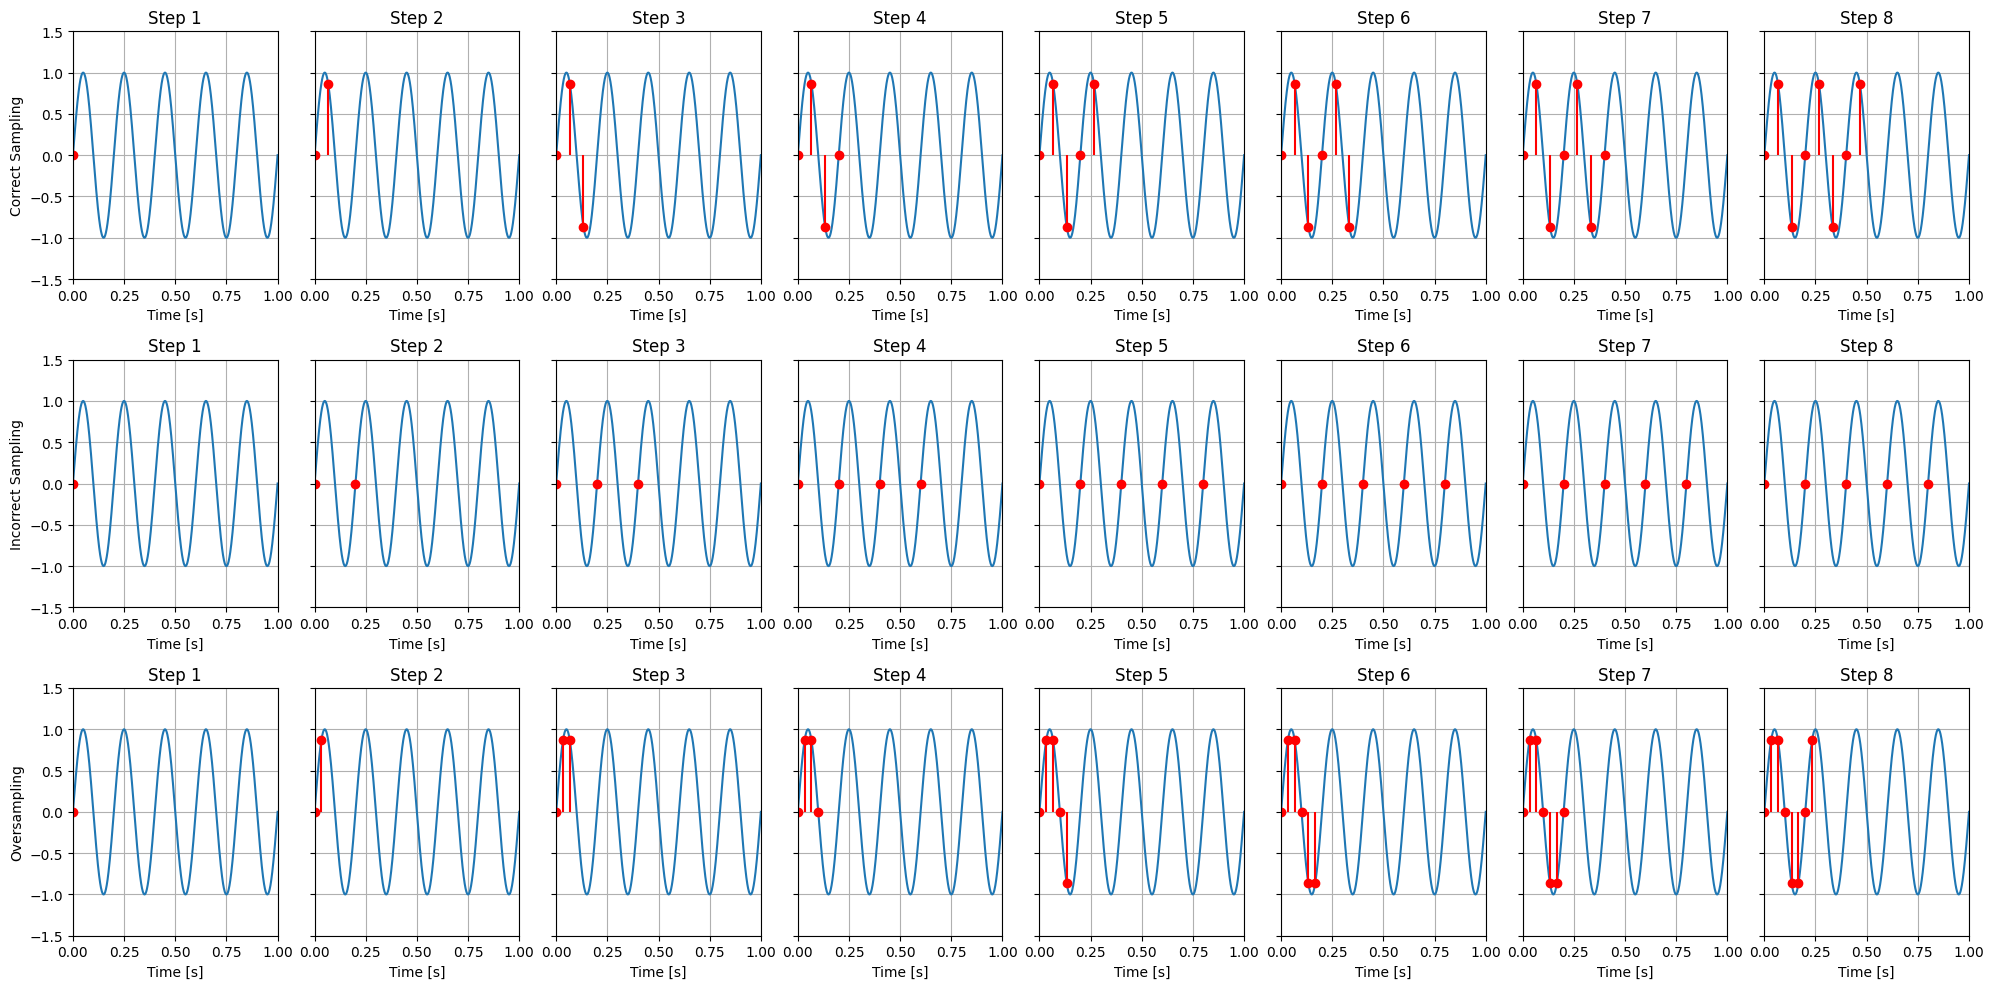

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the continuous signal
def continuous_signal(t):
    return np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave

# Sampling parameters for correct sampling (Nyquist rate)
fs_correct = 15  # Sampling frequency (Hz)
T_s_correct = 1 / fs_correct  # Sampling period

# Sampling parameters for incorrect sampling (below Nyquist rate)
fs_incorrect = 5  # Sampling frequency (Hz)
T_s_incorrect = 1 / fs_incorrect  # Sampling period

# Sampling parameters for oversampling (above Nyquist rate)
fs_oversample = 30  # Sampling frequency (Hz)
T_s_oversample = 1 / fs_oversample  # Sampling period

# Generate time vectors
t_continuous = np.linspace(0, 1, 1000)
t_sampled_correct = np.arange(0, 1, T_s_correct)
t_sampled_incorrect = np.arange(0, 1, T_s_incorrect)
t_sampled_oversample = np.arange(0, 1, T_s_oversample)

# Generate signal values
y_continuous = continuous_signal(t_continuous)
y_sampled_correct = continuous_signal(t_sampled_correct)
y_sampled_incorrect = continuous_signal(t_sampled_incorrect)
y_sampled_oversample = continuous_signal(t_sampled_oversample)

# Create subplots for steps
fig, axes = plt.subplots(3, 8, figsize=(20, 10), sharey=True)

# Plotting steps for correct sampling
for i in range(8):
    axes[0, i].plot(t_continuous, y_continuous, label='Continuous Signal')
    axes[0, i].stem(t_sampled_correct[:i+1], y_sampled_correct[:i+1], 'r', markerfmt='ro', basefmt=" ", label='Sampled Signal')
    axes[0, i].set_xlim(0, 1)
    axes[0, i].set_ylim(-1.5, 1.5)
    if i == 0:
        axes[0, i].set_ylabel('Correct Sampling')
    axes[0, i].set_xlabel('Time [s]')
    axes[0, i].set_title(f'Step {i+1}')
    axes[0, i].grid(True)

# Plotting steps for incorrect sampling
for i in range(8):
    axes[1, i].plot(t_continuous, y_continuous, label='Continuous Signal')
    axes[1, i].stem(t_sampled_incorrect[:i+1], y_sampled_incorrect[:i+1], 'r', markerfmt='ro', basefmt=" ", label='Sampled Signal')
    axes[1, i].set_xlim(0, 1)
    axes[1, i].set_ylim(-1.5, 1.5)
    if i == 0:
        axes[1, i].set_ylabel('Incorrect Sampling')
    axes[1, i].set_xlabel('Time [s]')
    axes[1, i].set_title(f'Step {i+1}')
    axes[1, i].grid(True)

# Plotting steps for oversampling
for i in range(8):
    axes[2, i].plot(t_continuous, y_continuous, label='Continuous Signal')
    axes[2, i].stem(t_sampled_oversample[:i+1], y_sampled_oversample[:i+1], 'r', markerfmt='ro', basefmt=" ", label='Sampled Signal')
    axes[2, i].set_xlim(0, 1)
    axes[2, i].set_ylim(-1.5, 1.5)
    if i == 0:
        axes[2, i].set_ylabel('Oversampling')
    axes[2, i].set_xlabel('Time [s]')
    axes[2, i].set_title(f'Step {i+1}')
    axes[2, i].grid(True)

plt.tight_layout()
plt.show()


## Steps in Digital Signal Processing

1. **Sampling**: Converting the continuous-time signal into a discrete-time signal.
2. **Quantization**: Converting the continuous-amplitude signal into a discrete-amplitude signal.
3. **Encoding**: Converting the quantized signal into a digital code.
4. **Transmission**: Sending the digital signal over a communication channel.
5. **Reconstruction**: Converting the digital signal back into an analog signal.

## Sampling

Sampling involves measuring the amplitude of a continuous signal at regular intervals. The sampling rate (or sampling frequency) must be at least <span style="background-color: #F9F9E0;">twice the highest frequency present in the signal</span> to avoid <span style="background-color: #FF90BC;">aliasing</span>.

### *Example*: Sampling a Sine Wave in Python

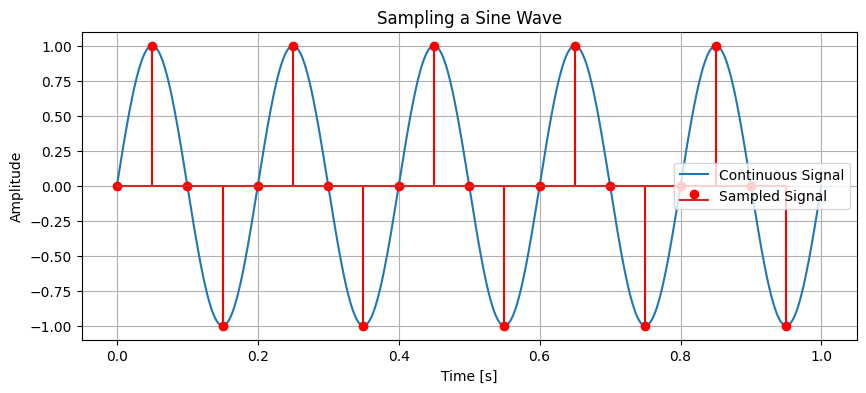

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Continuous signal
t = np.linspace(0, 1, 1000)  # Time vector
f = 5  # Frequency in Hz
continuous_signal = np.sin(2 * np.pi * f * t)

# Sampled signal
fs = 20  # Sampling frequency in Hz
n = np.arange(0, 1, 1/fs)  # Sampling instances
sampled_signal = np.sin(2 * np.pi * f * n)

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(t, continuous_signal, label='Continuous Signal')
plt.stem(n, sampled_signal, 'r', markerfmt='ro', label='Sampled Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Sampling a Sine Wave')
plt.legend()
plt.grid(True)
plt.show()

### Aliasing

<span style="background-color: #FF90BC;">Aliasing</span> occurs when a signal is sampled at a rate below the Nyquist rate. It causes different signals to become indistinguishable (or aliases of one another) when sampled.

### *Example*: Aliasing in Python

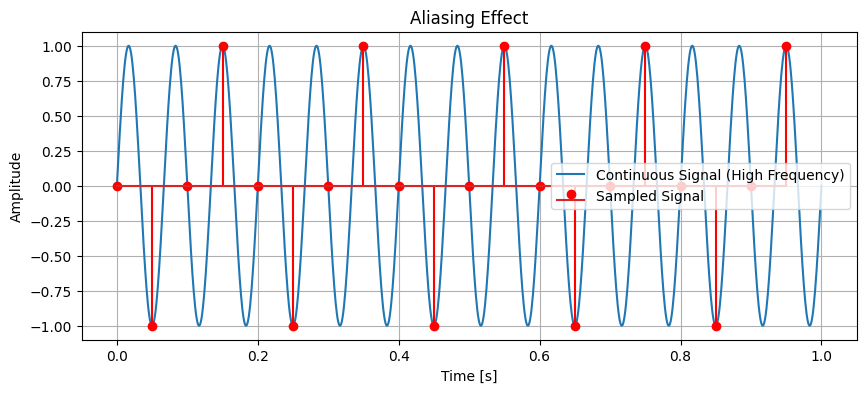

In [2]:
# Continuous signal with higher frequency
t = np.linspace(0, 1, 1000)  # Time vector
f = 15  # Frequency in Hz (higher than Nyquist frequency for fs=20Hz)
continuous_signal = np.sin(2 * np.pi * f * t)

# Sampled signal
fs = 20  # Sampling frequency in Hz
n = np.arange(0, 1, 1/fs)  # Sampling instances
sampled_signal = np.sin(2 * np.pi * f * n)

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(t, continuous_signal, label='Continuous Signal (High Frequency)')
plt.stem(n, sampled_signal, 'r', markerfmt='ro', label='Sampled Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Aliasing Effect')
plt.legend()
plt.grid(True)
plt.show()

> $\textcolor{#FFC0D9}{\Longrightarrow}$ The Nyquist Rate is <span style="background-color: #F9F9E0;">twice the maximum component frequency</span> of the function being sampled. It's the sampling frequency you would need to avoid <span style="background-color: #F9F9E0;">aliasing</span> in the digital signal.

## Digitalization

There is no critical number of bits above which no information is lost. <span style="background-color: #F9F9E0;">The more bits we allocate per sample, the less noise we add to the signal</span>. Decreasing the number of bits monotonically reduces the Signal-to-Noise Ratio (SNR). Analog signal values outside the allowed range specified by the digitizer, i.e., the number of bits it can represent, are clipped to the maximum permitted values.

### *Example*:

This code creates a 4x4 grid of subplots, each demonstrating the effect of different sampling frequencies on a 5 Hz sine wave. The sampling frequencies range from below the Nyquist rate to much higher than the Nyquist rate:

- 5 Hz: Below the Nyquist rate, resulting in aliasing.
- 10 Hz: Nyquist rate, which is the minimum required sampling frequency.
- 20 Hz: Above the Nyquist rate, providing a more accurate representation.
- 40 Hz and higher: Increasingly accurate representations with more samples.


In these plots:

- **Continuous Signal**: The original 5 Hz sine wave.
- **Sampled Signal**: The sampled points at each specified sampling frequency.

By comparing these plots, you can clearly see the importance of sampling at or above the Nyquist rate to accurately capture and reconstruct the original signal.

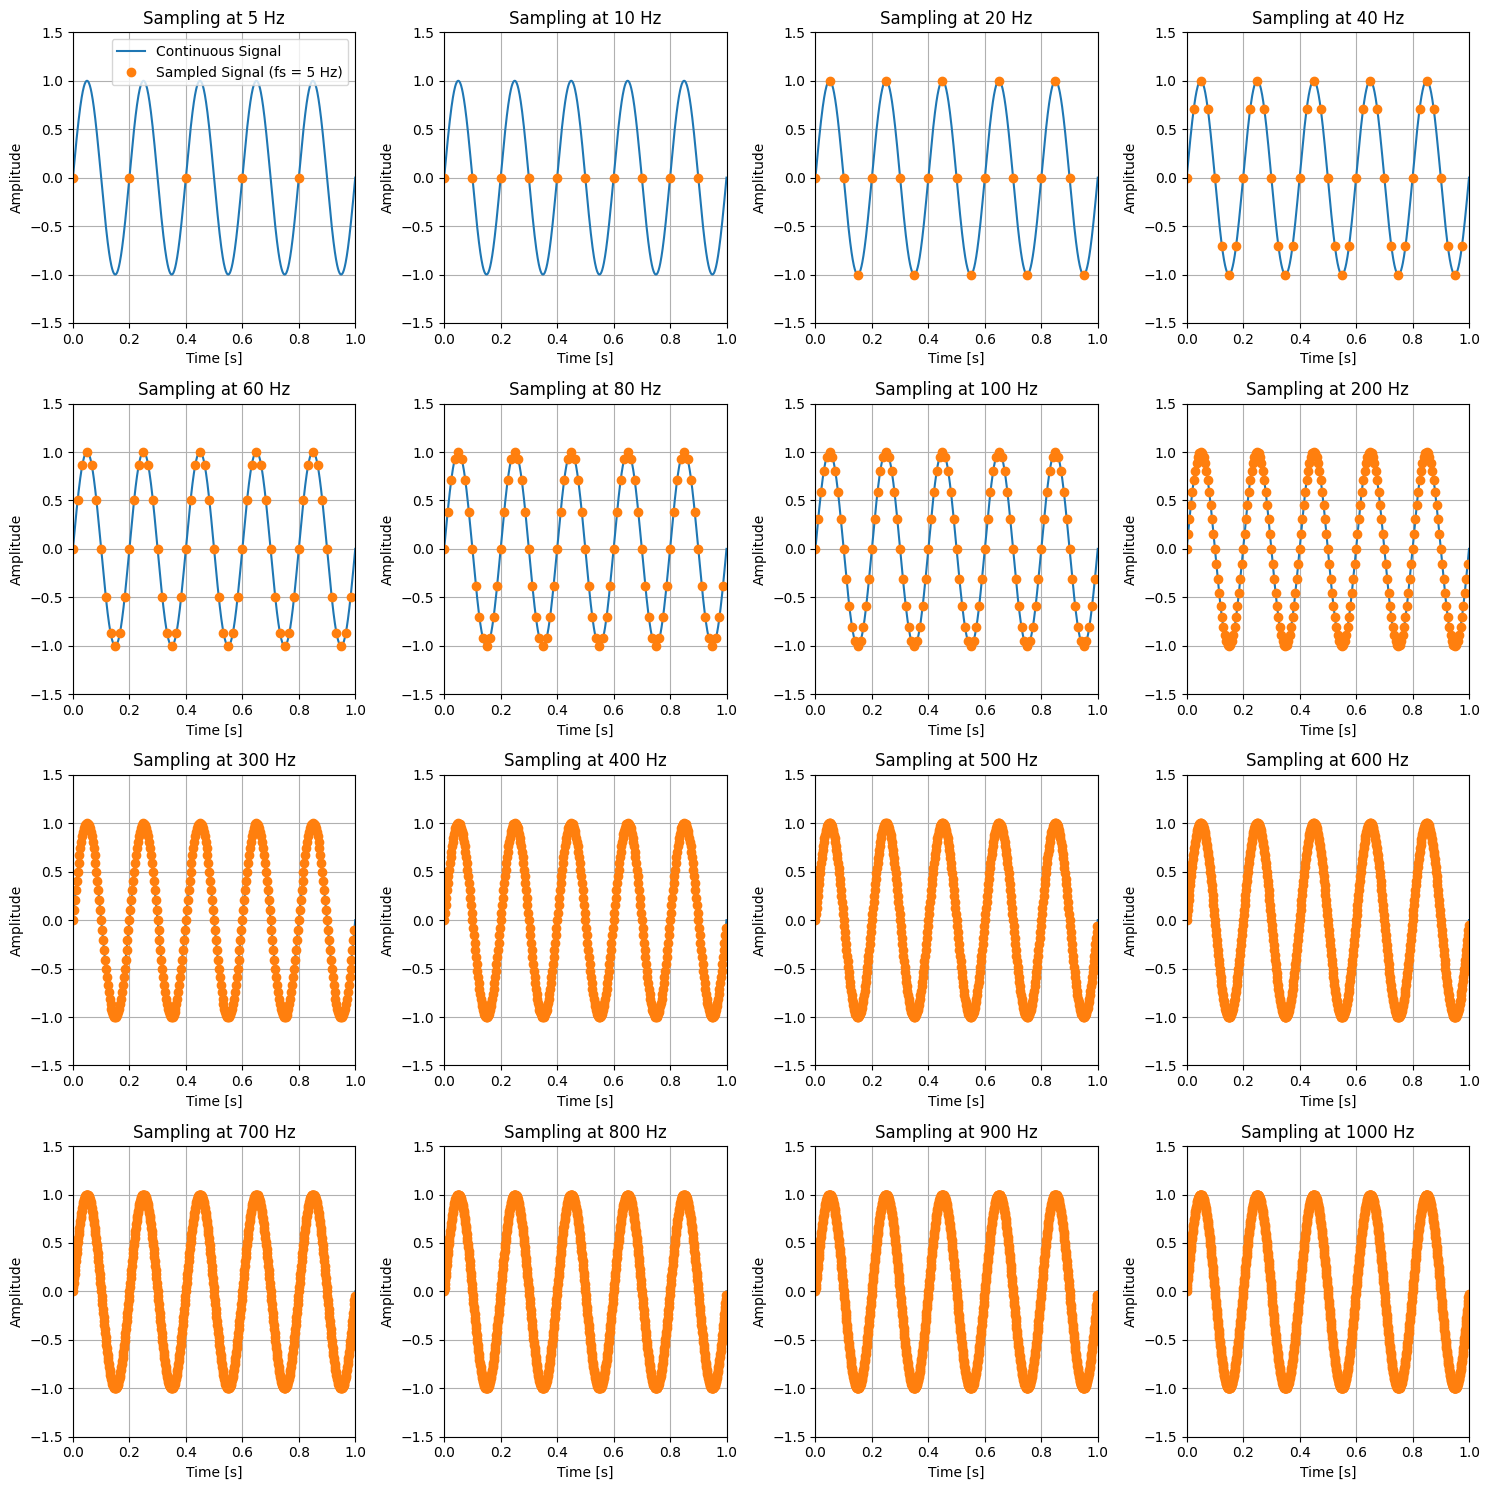

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Define the continuous signal
def continuous_signal(t):
    return np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave

# Define time range
tmin = 0
tmax = 1

# Generate continuous time vector
t = np.linspace(tmin, tmax, 1000)
x = continuous_signal(t)

# Define sampling frequencies
sampling_frequencies = [5, 10, 20, 40, 60, 80, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

# Plot the continuous signal in each subplot
for i, ax in enumerate(axes.flat):
    fs = sampling_frequencies[i]
    T = 1 / fs
    nmin = np.ceil(tmin / T)
    nmax = np.floor(tmax / T)
    n = np.arange(nmin, nmax)
    x_sampled = continuous_signal(n * T)
    
    ax.plot(t, x, label='Continuous Signal')
    ax.plot(n * T, x_sampled, 'o', label=f'Sampled Signal (fs = {fs} Hz)')
    ax.set_xlim(tmin, tmax)
    ax.set_ylim(-1.5, 1.5)
    ax.set_title(f'Sampling at {fs} Hz')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Amplitude')
    ax.grid(True)
    if i == 0:
        ax.legend()

plt.tight_layout()
plt.show()


## Anti-Aliasing and Reconstruction Filters

When dealing with analog-to-digital conversion, it is crucial to understand the role of anti-aliasing and reconstruction filters. These filters ensure that the digital representation of a signal accurately reflects the original analog signal without introducing distortions or inaccuracies. 

### Anti-Aliasing Filter

An anti-aliasing filter is a low-pass filter applied to an analog signal before the sampling process. Its primary function is to <span style="background-color: #F9F9E0;">remove high-frequency components from the signal that could cause aliasing</span>. Aliasing occurs when high-frequency components of the signal are misinterpreted as lower frequencies during the sampling process, leading to distortions in the digitized signal.

#### Why is Anti-Aliasing Important?

According to the Nyquist-Shannon sampling theorem, to accurately reconstruct an analog signal from its samples, the sampling rate must be at least twice the highest frequency present in the signal. This minimum rate is known as the Nyquist rate. If a signal contains frequencies higher than half the sampling rate (the Nyquist frequency), these higher frequencies can alias, or fold back, into the lower frequency spectrum, causing distortion.

To prevent this, an anti-aliasing filter is used to <span style="background-color: #F9F9E0;">attenuate the frequencies above the Nyquist frequency</span>, ensuring that only the frequencies that can be accurately sampled are present in the signal.

#### Characteristics of an Anti-Aliasing Filter

- **Low-Pass Filter**: Allows low-frequency components to pass through while attenuating high-frequency components.
- **Cutoff Frequency**: Set just below the Nyquist frequency to ensure all frequencies above this point are removed or significantly reduced.
- **Filter Order**: Higher-order filters provide steeper roll-off characteristics, meaning they more effectively attenuate frequencies above the cutoff frequency.

### Anti-Aliasing Filter Example

> $\textcolor{#FFC0D9}{\Longrightarrow}$ Since we haven't seen exactly what the Fourier transform means, assume that it's a way of representing time functions in another domain (frequency domain) which makes computations easier. In other words, it's like a <span style="background-color: #F9F9E0;">change of basis</span>.

#### *Example* of an Anti-Aliasing Filter

Consider a signal with a maximum frequency component of 250 Hz. If we sample this signal at 1000 Hz, the Nyquist frequency is 500 Hz. To prevent aliasing, we use an anti-aliasing filter with a cutoff frequency just below 500 Hz, ideally around 100 Hz in this example.

In practical terms, implementing an anti-aliasing filter might involve using a digital filter applied to the signal after it has been digitized but before it is downsampled.

#### Mathematical Representation

Let $X(f)$ represent the frequency domain representation of the signal $x(t)$. An ideal low-pass filter $H(f)$ with a cutoff frequency $f_c$ can be defined as:

$$
H(f) = 
\begin{cases} 
1 & |f| \leq f_c \\
0 & |f| > f_c 
\end{cases}
$$

The filtered signal $Y(f)$ in the frequency domain is then given by:

$$
Y(f) = X(f) \cdot H(f)
$$

By performing an inverse Fourier transform, we can obtain the time-domain representation of the filtered signal $y(t)$:

$$
y(t) = \mathcal{F}^{-1}\{Y(f)\}
$$

### Code explanation

> $\textcolor{#FFC0D9}{\Longrightarrow}$ For the code shown below we use an FIR (Finite Impulse Response) for now understand this filter as a tool used in digital signal processing to modify signals, like audio or data. Imagine it as a recipe where you mix the current and past input signals using specific amounts (called coefficients) to create a new signal. Unlike other filters, an FIR filter uses only a fixed number of past inputs, making it easier to control and ensuring the output is stable and predictable. This makes FIR filters great for tasks like smoothing out noise or enhancing certain parts of a signal.

1. **Filter Design**: The `firwin` function [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html) is used to design a low-pass FIR filter with a cutoff frequency of 100 Hz and a filter length of 29 coefficients.
2. **Signal Generation**: A sample signal is created with both a 2 Hz sinusoid (low-frequency) and a 250 Hz sinusoid (high-frequency).
3. **Filtering**: The `lfilter` function applies the FIR filter to the signal.
4. **Visualization**: The frequency response of the filter is plotted, showing how it attenuates frequencies above the cutoff. The original and filtered signals are also plotted, demonstrating the effect of the filter in the time domain.

### Conclusion

The anti-aliasing filter plays a crucial role in digital signal processing by ensuring that high-frequency components are attenuated before downsampling, thereby preventing aliasing and preserving the integrity of the digitized signal.

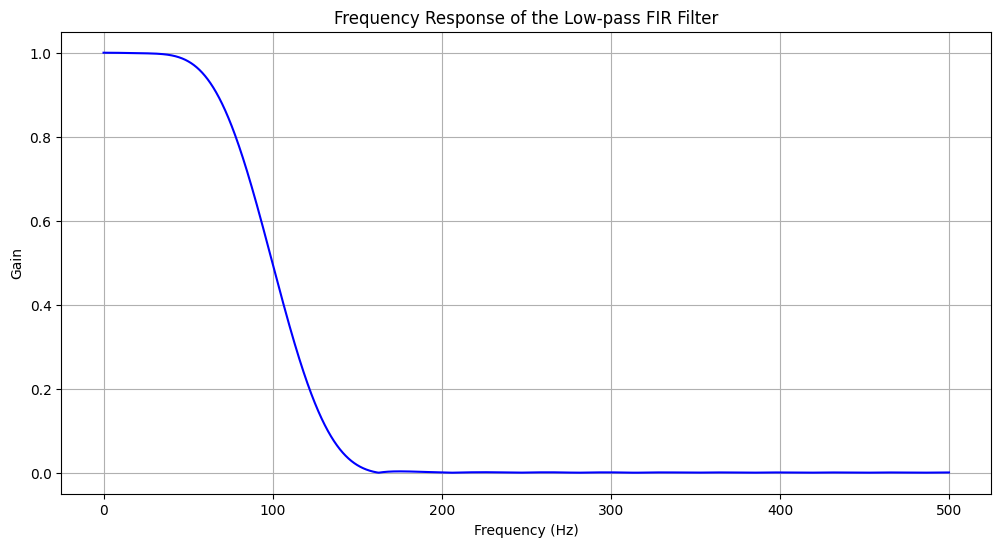

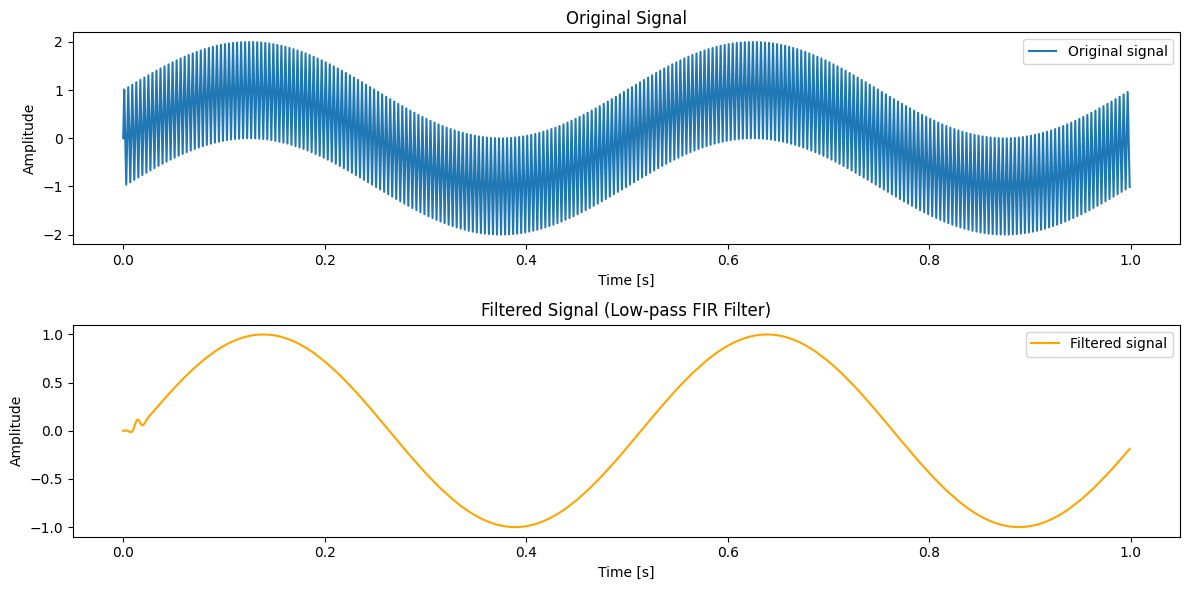

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, freqz

# Sample rate and desired cutoff frequencies (in Hz).
sample_rate = 1000.0  # Sampling rate in Hz
nyquist_rate = sample_rate / 2.0  # Nyquist rate
cutoff_freq = 100.0  # Desired cutoff frequency of the filter, Hz

# Length of the filter (number of coefficients, i.e. the filter order + 1)
numtaps = 29

# Use firwin to create a low-pass FIR filter
fir_coeff = firwin(numtaps, cutoff_freq/nyquist_rate)

# Generate a sample signal: 2 Hz and 250 Hz sinusoids
t = np.linspace(0, 1.0, int(sample_rate), endpoint=False)
signal = np.sin(2 * np.pi * 2 * t) + np.sin(2 * np.pi * 250 * t)

# Apply the FIR filter to the signal
filtered_signal = lfilter(fir_coeff, 1.0, signal)

# Plot the frequency response of the filter
w, h = freqz(fir_coeff, worN=8000)
plt.figure(figsize=(12, 6))
plt.plot(0.5*sample_rate*w/np.pi, np.abs(h), 'b')
plt.title("Frequency Response of the Low-pass FIR Filter")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid()

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Original signal')
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Filtered signal', color='orange')
plt.title('Filtered Signal (Low-pass FIR Filter)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()
